Air Quality and Pollution Assessment:
https://www.kaggle.com/datasets/mujtabamatin/air-quality-and-pollution-assessment

* Temperature (°C): Average temperature of the region.
* Humidity (%): Relative humidity recorded in the region.
* PM2.5 Concentration (µg/m³): Fine particulate matter levels.
* PM10 Concentration (µg/m³): Coarse particulate matter levels.
* NO2 Concentration (ppb): Nitrogen dioxide levels.
* SO2 Concentration (ppb): Sulfur dioxide levels.
* CO Concentration (ppm): Carbon monoxide levels.
* Proximity to Industrial Areas (km): Distance to the nearest industrial zone.
* Population Density (people/km²): Number of people per square kilometer in the region.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

In [3]:
df = pd.read_csv('data.csv')
df

Temperature  Humidity  PM2.5   PM10   NO2   SO2    CO  \
0            29.8      59.1    5.2   17.9  18.9   9.2  1.72   
1            28.3      75.6    2.3   12.2  30.8   9.7  1.64   
2            23.1      74.7   26.7   33.8  24.4  12.6  1.63   
3            27.1      39.1    6.1    6.3  13.5   5.3  1.15   
4            26.5      70.7    6.9   16.0  21.9   5.6  1.01   
...           ...       ...    ...    ...   ...   ...   ...   
4995         40.6      74.1  116.0  126.7  45.5  25.7  2.11   
4996         28.1      96.9    6.9   25.0  25.3  10.8  1.54   
4997         25.9      78.2   14.2   22.1  34.8   7.8  1.63   
4998         25.3      44.4   21.4   29.0  23.7   5.7  0.89   
4999         24.1      77.9   81.7   94.3  23.2  10.5  1.38   

      Proximity_to_Industrial_Areas  Population_Density Air Quality  
0                               6.3                 319    Moderate  
1                               6.0                 611    Moderate  
2                               5.2                 619    Moderate  
3                              11.1                 551        Good  
4                              12.7                 303        Good  
...                             ...                 ...         ...  
4995                            2.8                 765   Hazardous  
4996                            5.7                 709    Moderate  
4997                            9.6                 379    Moderate  
4998                           11.6                 241        Good  
4999                            8.3                 461    Moderate  

[5000 rows x 10 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


In [5]:
df.describe()

Temperature     Humidity        PM2.5         PM10          NO2  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean     30.029020    70.056120    20.142140    30.218360    26.412100   
std       6.720661    15.863577    24.554546    27.349199     8.895356   
min      13.400000    36.000000     0.000000    -0.200000     7.400000   
25%      25.100000    58.300000     4.600000    12.300000    20.100000   
50%      29.000000    69.800000    12.000000    21.700000    25.300000   
75%      34.000000    80.300000    26.100000    38.100000    31.900000   
max      58.600000   128.100000   295.000000   315.800000    64.900000   

               SO2           CO  Proximity_to_Industrial_Areas  \
count  5000.000000  5000.000000                    5000.000000   
mean     10.014820     1.500354                       8.425400   
std       6.750303     0.546027                       3.610944   
min      -6.200000     0.650000                       2.500000   
25%       5.100000     1.030000                       5.400000   
50%       8.000000     1.410000                       7.900000   
75%      13.725000     1.840000                      11.100000   
max      44.900000     3.720000                      25.800000   

       Population_Density  
count         5000.000000  
mean           497.423800  
std            152.754084  
min            188.000000  
25%            381.000000  
50%            494.000000  
75%            600.000000  
max            957.000000

array([[<Axes: title={'center': 'Temperature'}>,
        <Axes: title={'center': 'Humidity'}>,
        <Axes: title={'center': 'PM2.5'}>],
       [<Axes: title={'center': 'PM10'}>,
        <Axes: title={'center': 'NO2'}>, <Axes: title={'center': 'SO2'}>],
       [<Axes: title={'center': 'CO'}>,
        <Axes: title={'center': 'Proximity_to_Industrial_Areas'}>,
        <Axes: title={'center': 'Population_Density'}>]], dtype=object)

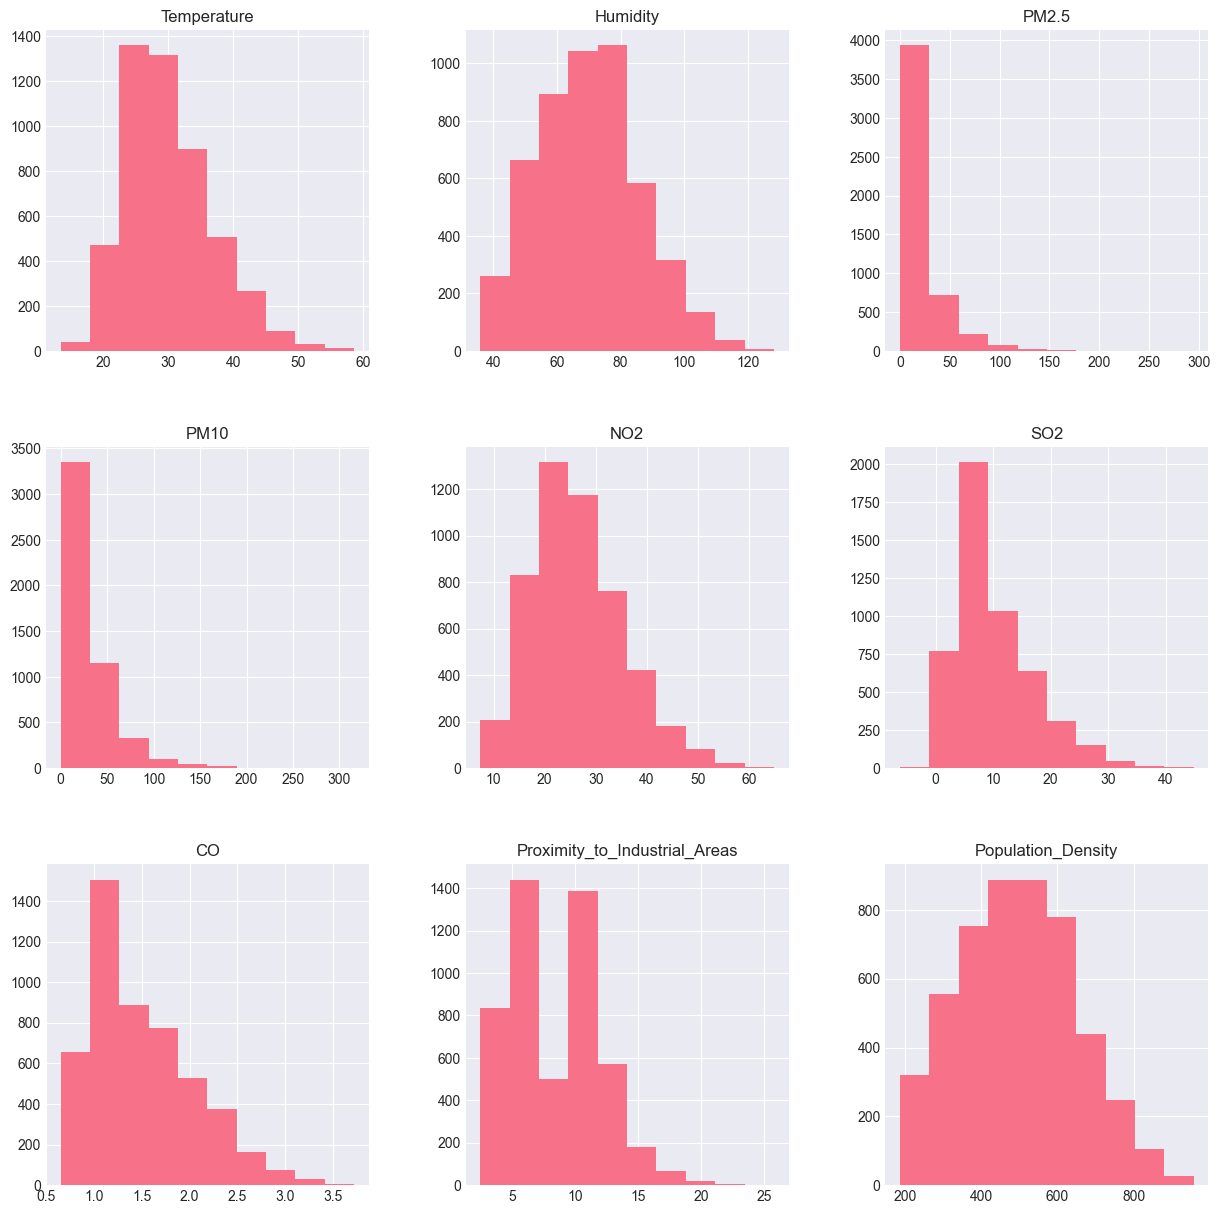

In [6]:
df.hist(figsize=(15,15))

In [7]:
df['Air Quality'].value_counts().sort_index()

Air Quality
Good         2000
Hazardous     500
Moderate     1500
Poor         1000
Name: count, dtype: int64

In [8]:
label_mapping = {
    "Good": 0,
    "Moderate": 1,
    "Poor": 2,
    "Hazardous": 3
}

label_names = {
    0: "Good",
    1: "Moderate",
    2: "Poor",
    3: "Hazardous"
}

df['Air Quality'] = df['Air Quality'].map(label_mapping)

In [9]:
from multidim_visualization import HighDimVisualizer

visualizer = HighDimVisualizer(random_state=42, label_names=label_names)

In [10]:
X = df.drop(['Air Quality'] , axis=1)
y = df[['Air Quality']]

feature_name = X.columns.tolist()

In [11]:
print(f"\nИнформация о данных:")
print(f"  Размер: {X.shape}")
print(f"  Количество классов: {len(np.unique(y))}")
print(f"  Количество признаков: {X.shape[1]}")
print(f"  Минимум: {X.min()}, Максимум: {X.max()}")
print(f"  Среднее: {X.mean()}, Стандартное отклонение: {X.std()}")


Информация о данных:
  Размер: (5000, 9)
  Количество классов: 4
  Количество признаков: 9
  Минимум: Temperature                       13.40
Humidity                          36.00
PM2.5                              0.00
PM10                              -0.20
NO2                                7.40
SO2                               -6.20
CO                                 0.65
Proximity_to_Industrial_Areas      2.50
Population_Density               188.00
dtype: float64, Максимум: Temperature                       58.60
Humidity                         128.10
PM2.5                            295.00
PM10                             315.80
NO2                               64.90
SO2                               44.90
CO                                 3.72
Proximity_to_Industrial_Areas     25.80
Population_Density               957.00
dtype: float64
  Среднее: Temperature                       30.029020
Humidity                          70.056120
PM2.5                             20.

In [12]:
X_scaled, y, feature_names = visualizer.set_data(X, y, feature_name)

ПОЛНАЯ ВИЗУАЛИЗАЦИЯ МНОГОМЕРНЫХ ДАННЫХ

1. Парные диаграммы рассеяния (PairPlot)


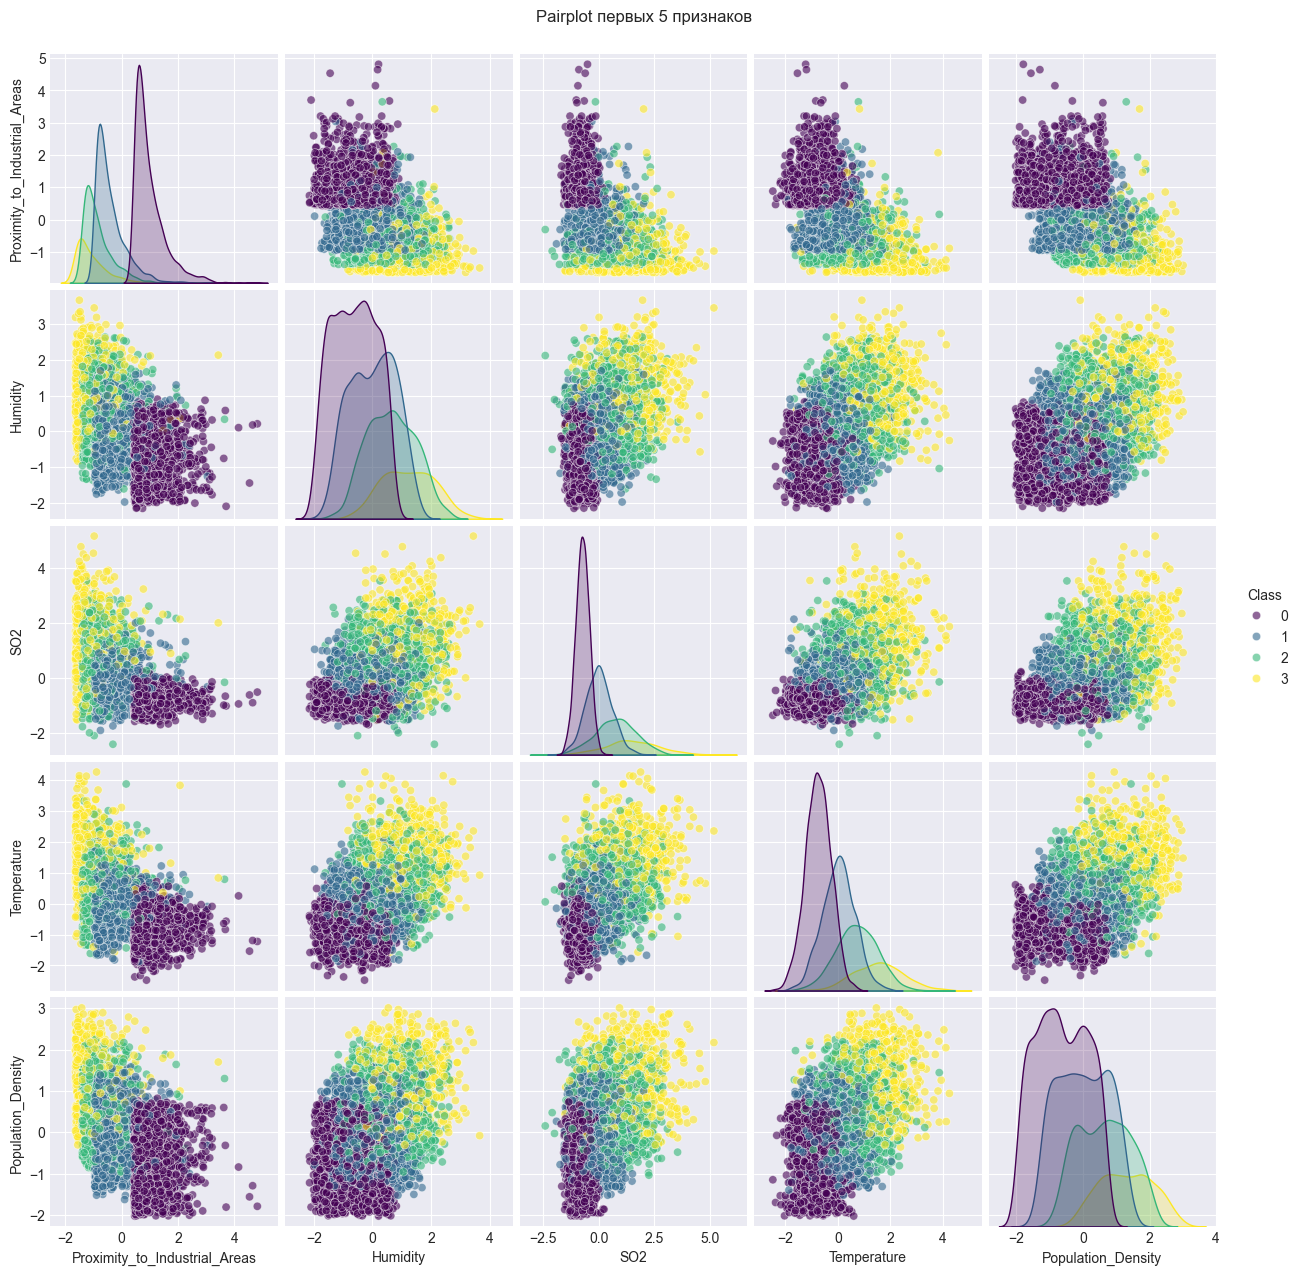


2. Тепловая карта корреляций


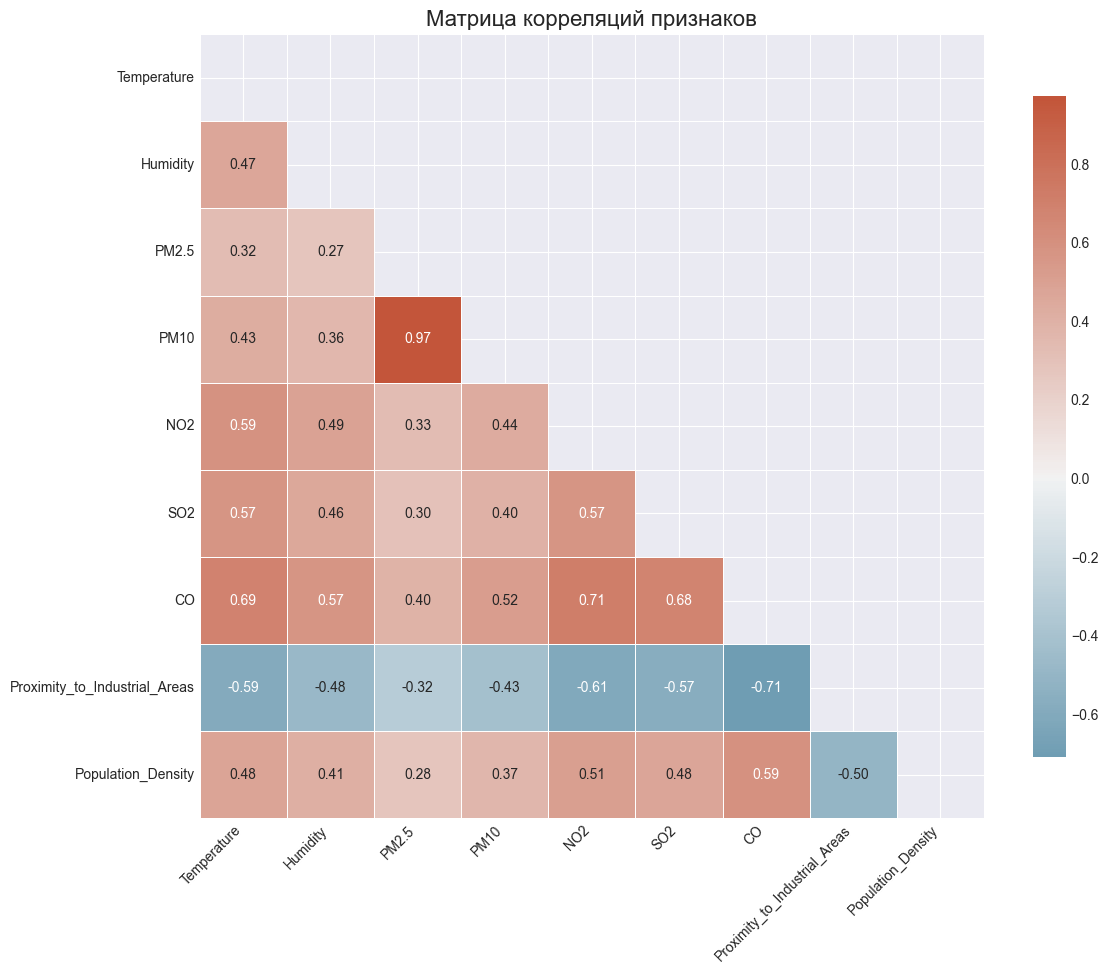


3. Визуализация PCA (2D и 3D)
Объясненная дисперсия: [0.55721851 0.14969909 0.06603658]
Суммарная объясненная дисперсия: 0.773


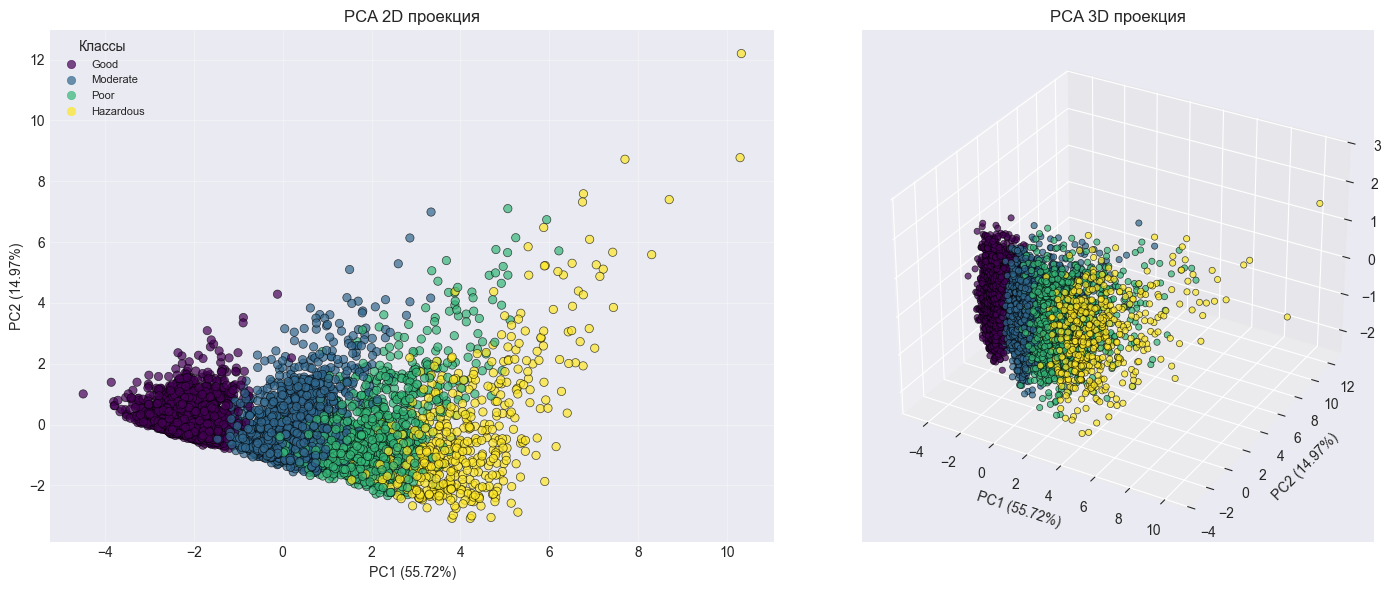

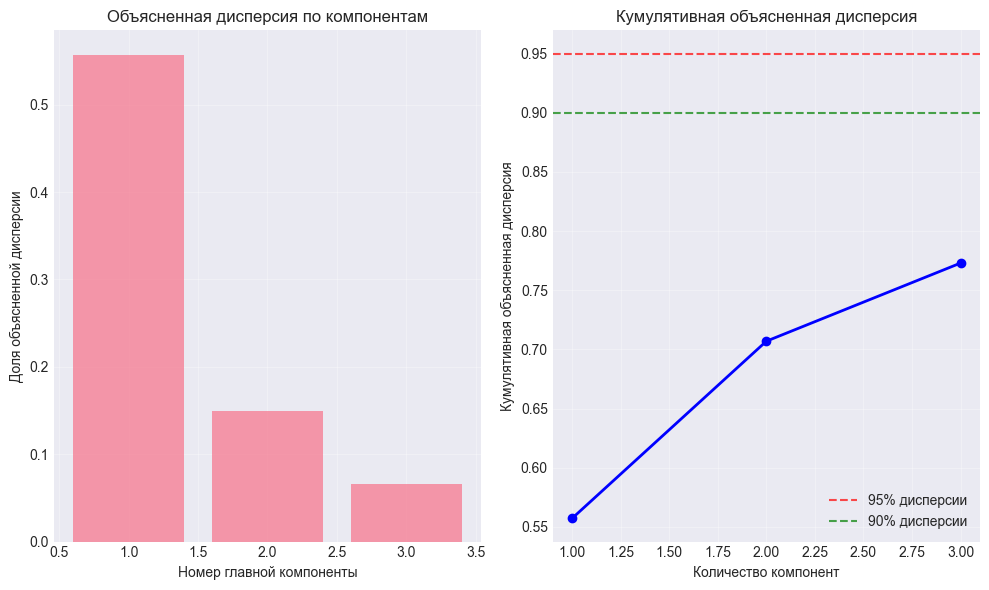


4. Визуализация t-SNE
  Применяем PCA для уменьшения размерности перед t-SNE...


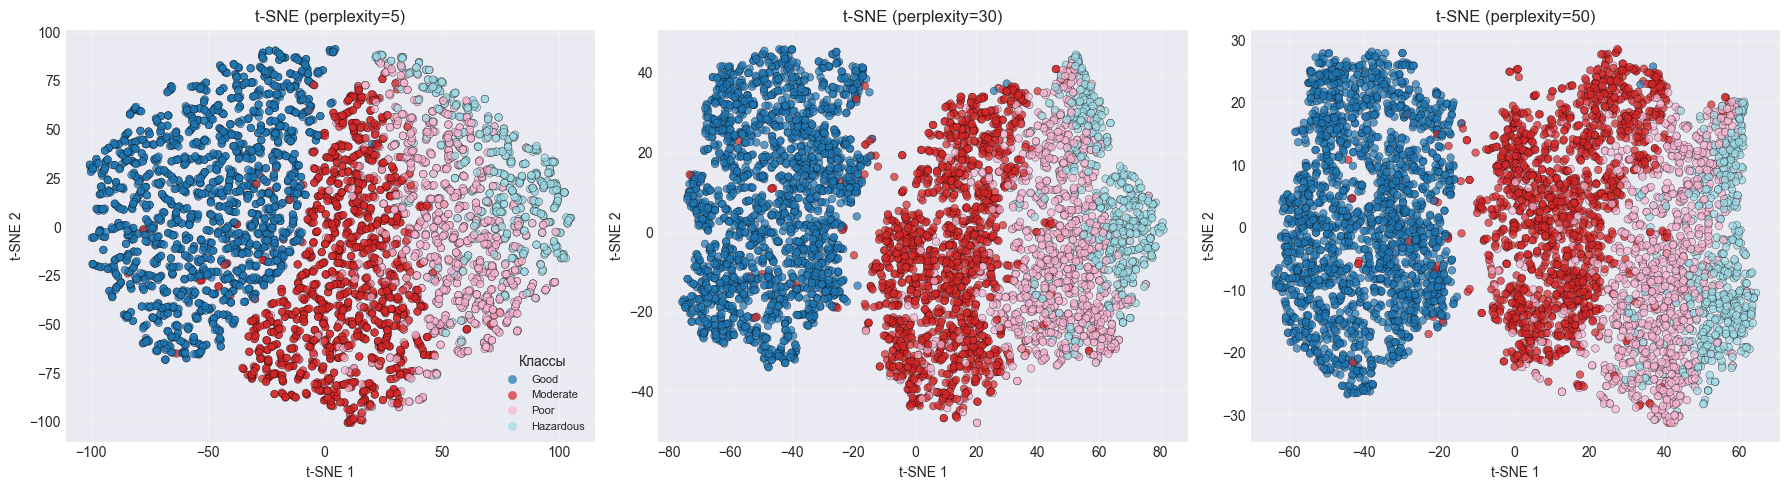


6. Параллельные координаты


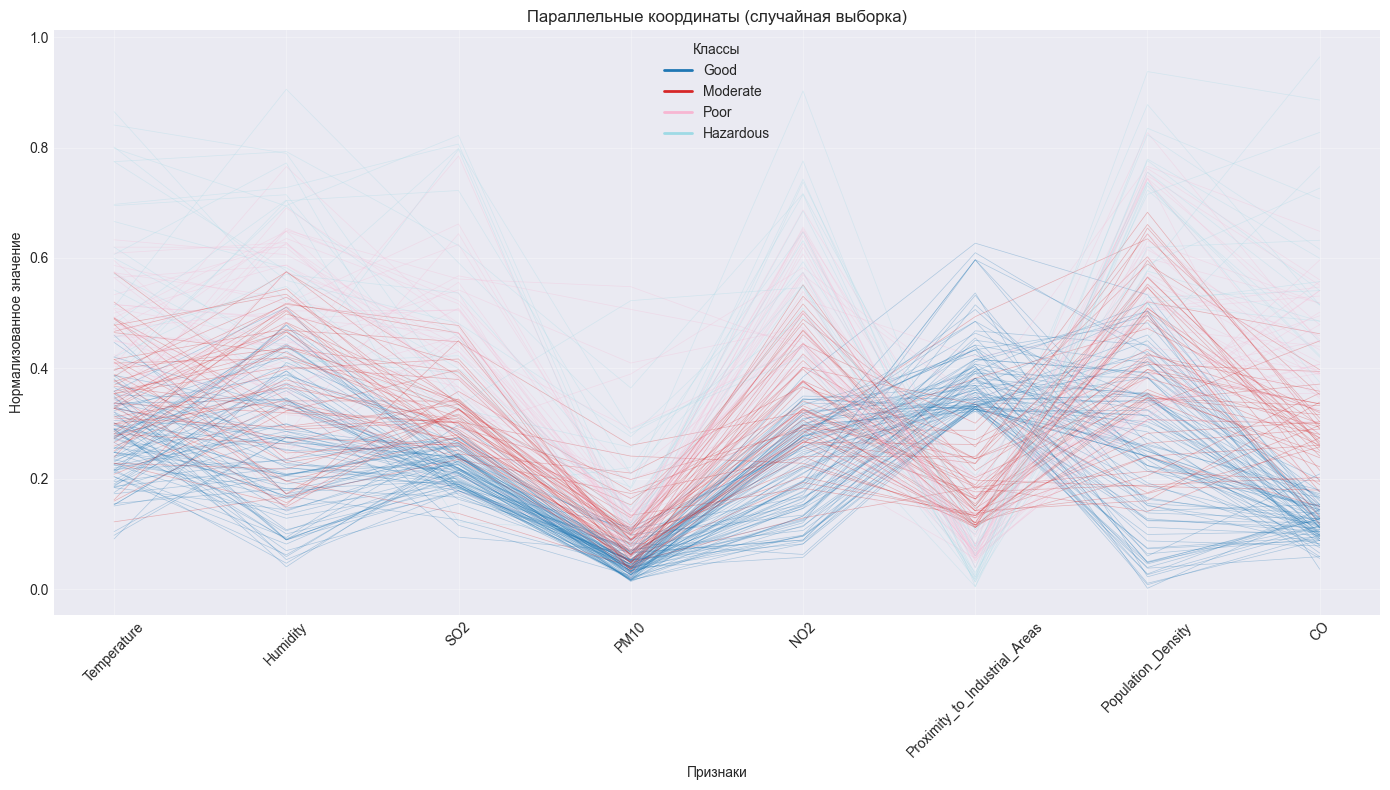


7. Радар-чарты по классам


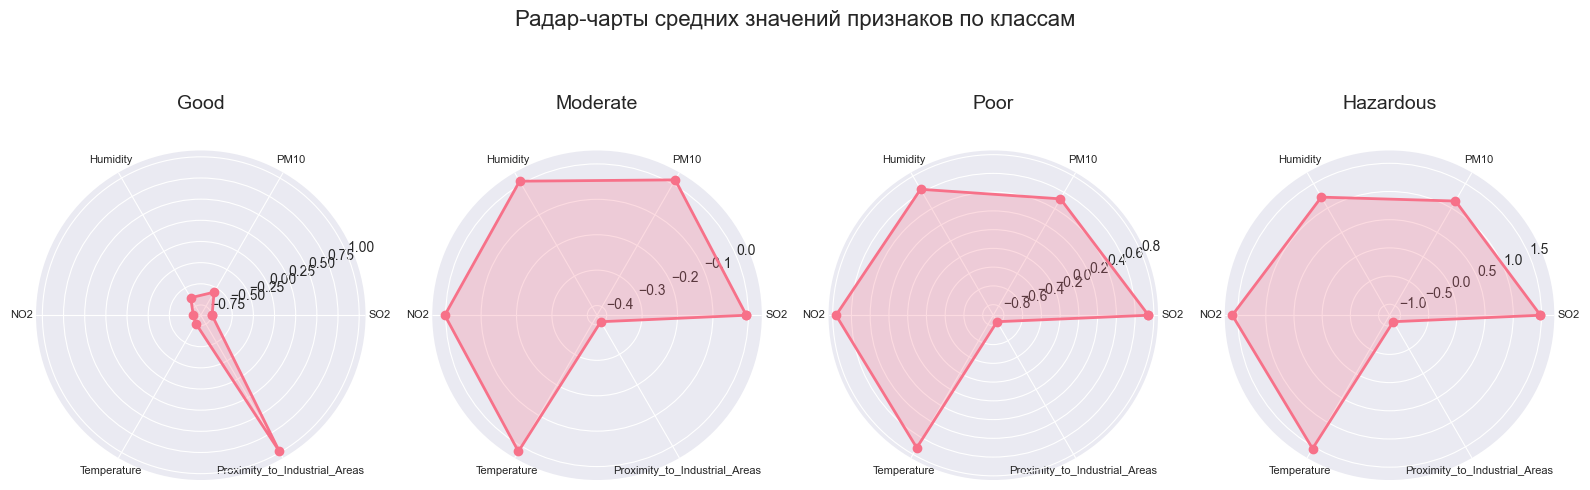


9. Сравнение методов уменьшения размерности
  Применяем PCA...
  Применяем t-SNE...
  Применяем MDS...
  Применяем Isomap...
  Применяем UMAP...


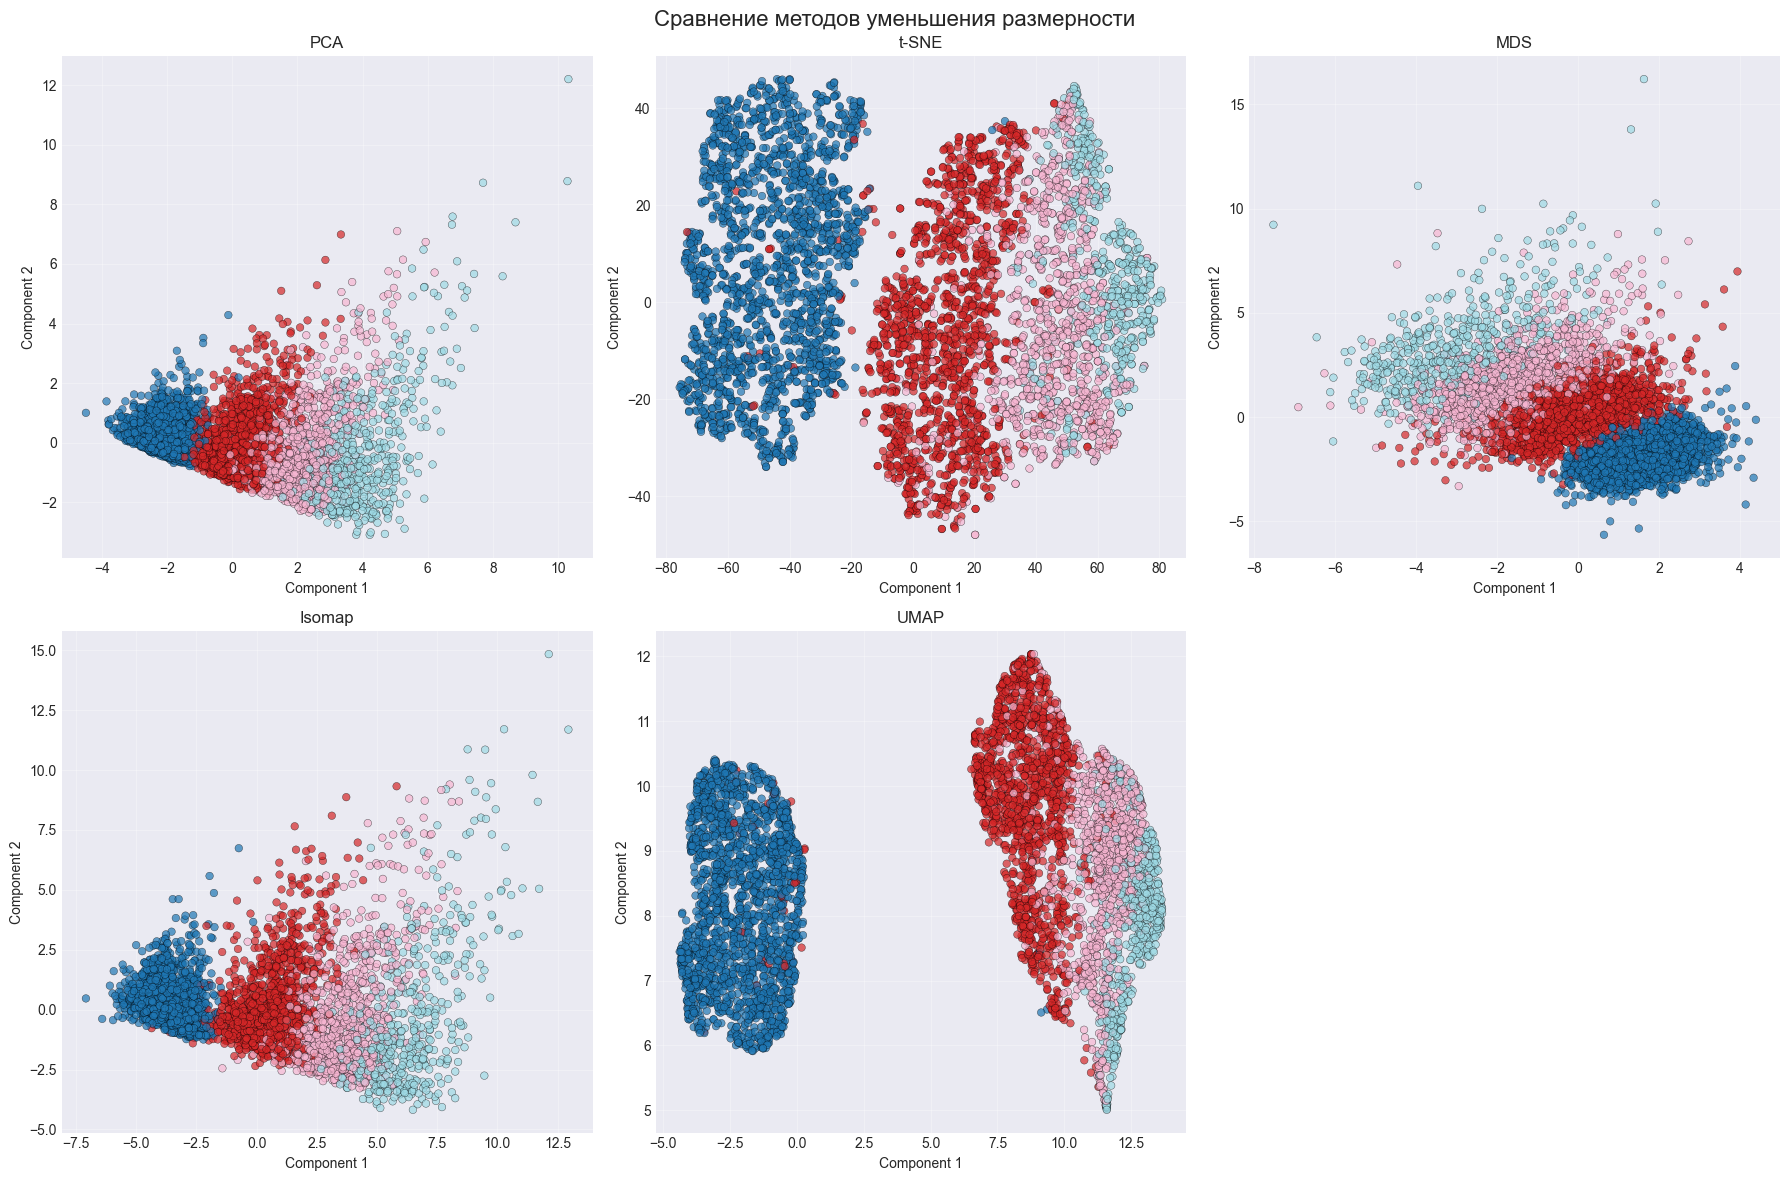


5. Визуализация UMAP


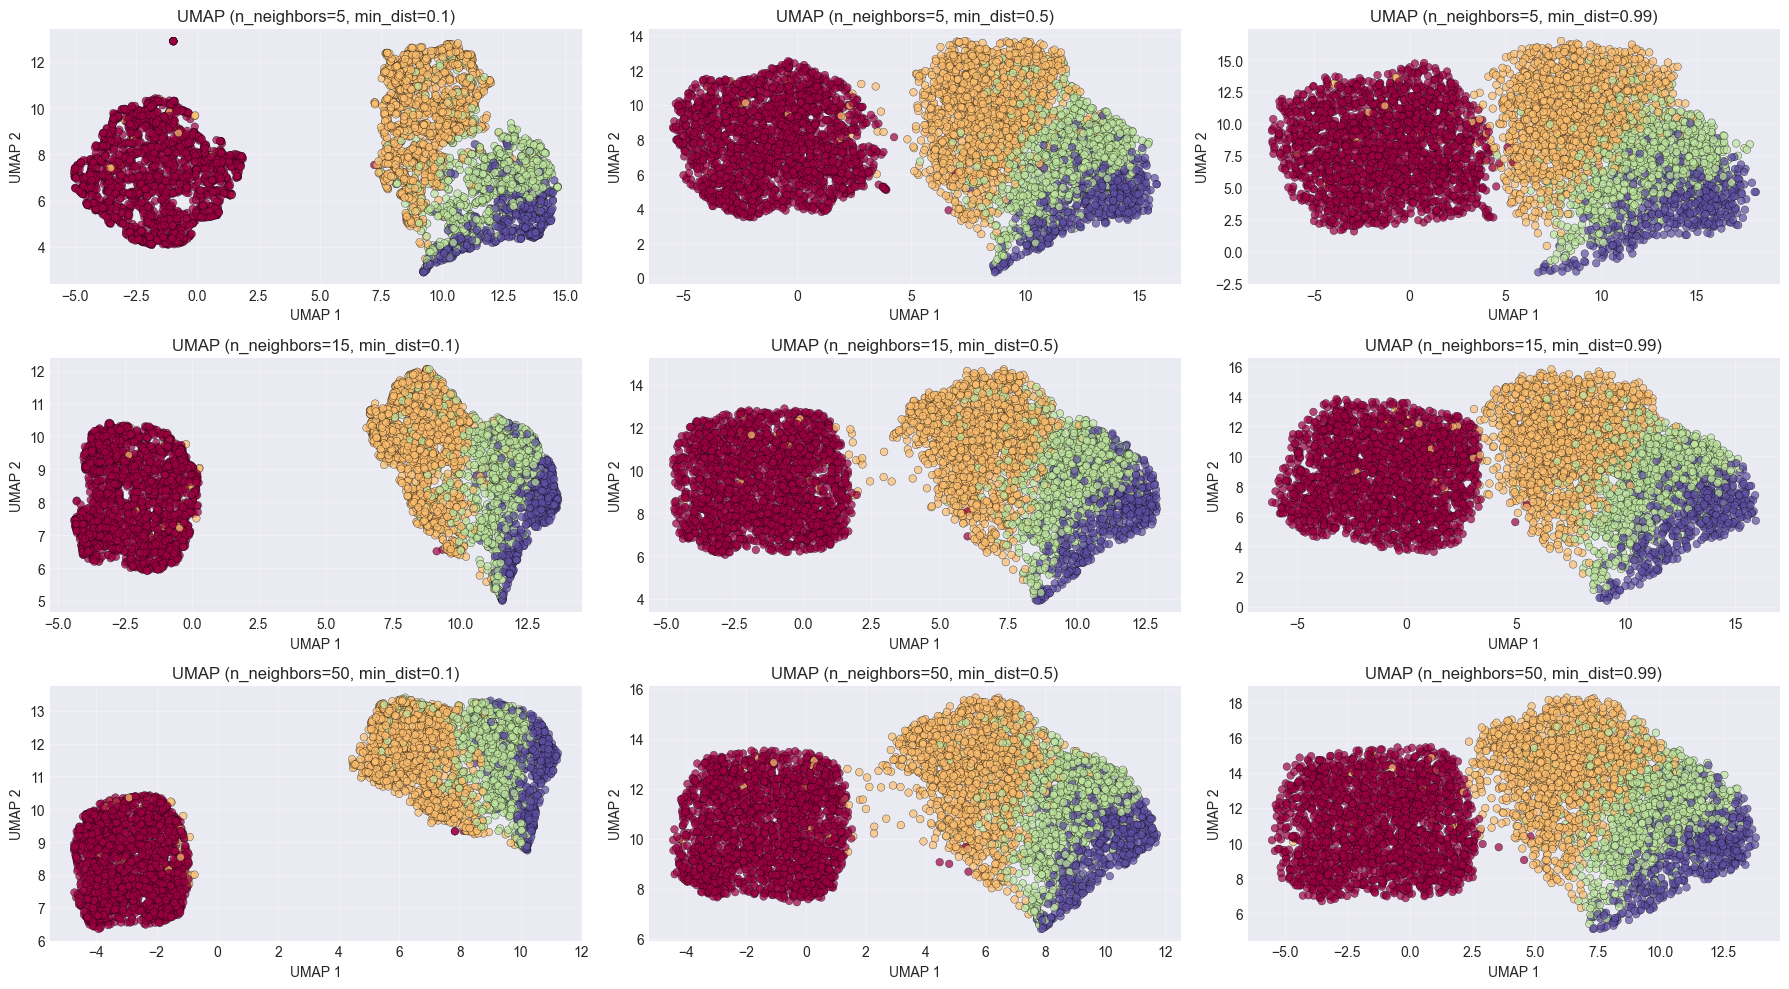


8. Интерактивная 3D визуализация (откроется в браузере)
  График сохранен в файл: interactive_3d_plot.html



ВИЗУАЛИЗАЦИЯ ЗАВЕРШЕНА


In [13]:
visualizer.run_full_visualization(X_scaled, y, feature_names, PCA_n_components=9)